# Datetime Variables

In this third notebook our focus is to discuss datetime variables. Datetime variables are variables that can assume date, time and datetime as values. For example, date of birth ('28-03-1982') is a date - and it can be expressed in many different ways, e.g. '1982-March' -, '23h:32m:20s' is a time, etc.  
It is important to highlight some characteristics of datetime variables when we are dealing with machine learning scenarios. We do not use these variables in a straight way in machine learning because: 1) They contain a large number of different values; 2) We can extract much more useful information by preprocessing them.

Another consideration that is necessary when dealing with date variables is that typically, the dates involved in the training set end up not being present in the test set. This means that the model does not know how to handle dates that were not present during training. We will discuss how to address this issue later in the course.

================================================================================================

## Hands-On: Peer-to-peer lending dataset

We will continue our studies exploring the lending dataset but now focusing on datetime variables presenting on it. 

In [1]:
# importing basic libraries
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# loading the data 
data_path = '../datasets/loan.csv'
lending_data = pd.read_csv(data_path)
lending_data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


The two variables that we are interested in are `date_issued` and `date_last_payment`:
- `date_issued`: date the loan was issued
- `date_last_payment`: date of the last payment to repay the loan

In [3]:
# seeing the type of these two variables
lending_data[['date_issued', 'date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

Although they are date variables, it is common to pandas treat them as objects, i.e., as strings. To work with datetime variables, we need to tell pandas to use them as datetime variables:

In [4]:
# creating two new datetime variables
lending_data['date_issued_dt'] = pd.to_datetime(lending_data['date_issued'])
lending_data['date_last_payment_dt'] = pd.to_datetime(lending_data['date_last_payment'])

An interesting visualization is to plot the `disbursed_amount` variable in time and separated by `market` variable (rating related to loan risk). To do that, let us create two new features regarding year and month:

In [7]:
# creating year and month features
lending_data['month'] = lending_data.date_issued_dt.dt.month
lending_data['year'] = lending_data.date_issued_dt.dt.year

Text(0, 0.5, 'Disbursed Amount')

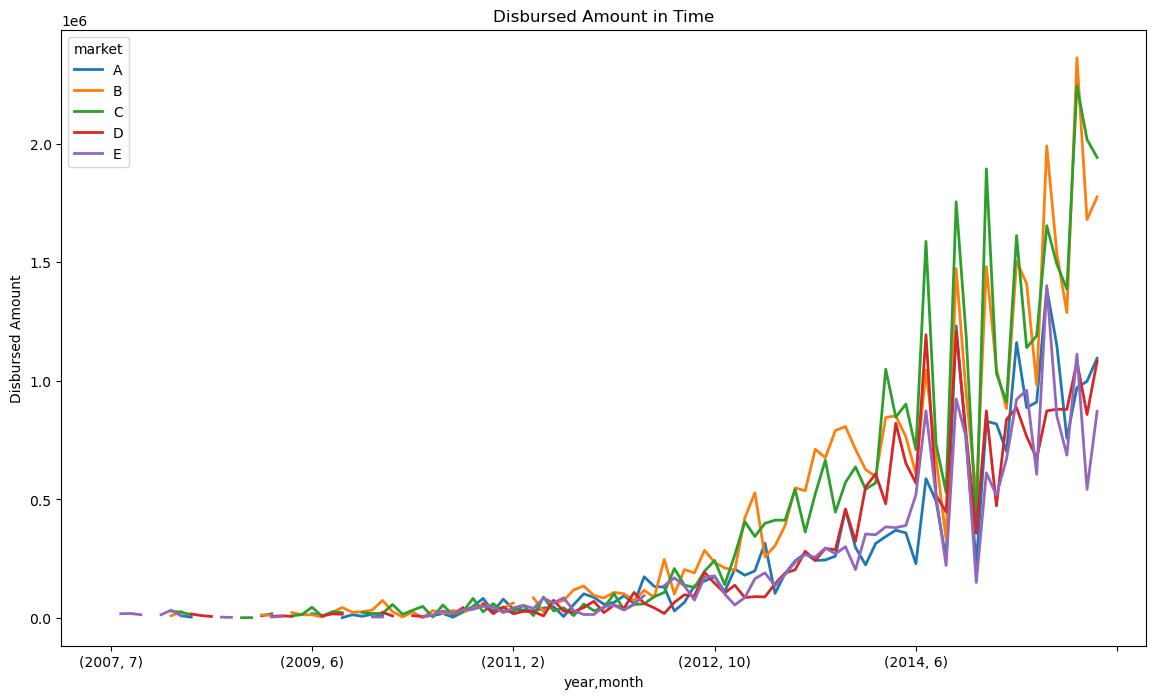

In [13]:
# Visualizing how much money has been disbursed 
# over the years to the different risk markets
fig = (
    lending_data
    .groupby(
        [
            'year', 
            'month', 
            'market'
        ]
        )['disbursed_amount']
        .sum().unstack().plot(
            figsize=(14, 8),
            linewidth=2
        )
)

fig.set_title('Disbursed Amount in Time')
fig.set_ylabel('Disbursed Amount')

It is clear from the graph above that the amount of money lent increased significantly from 2012 onwards. Furthermore, the groups belonging to classes B and C are those with the highest amount of money lent - and correspond to the good categories ( B) and medians (C) with regard to payment risk. Category A - the one with the lowest interest rates, since they are the ones with the least risk, presents a similar loan amount to category E - the one with the highest interest rates since it corresponds to the one with the highest associated risk.